# Bangladesh Budget Speech Analysis    
   **- Muhammad Imran**

### 1. Introduction
The goal of this project is to discover underlying trends in the budget speeches of Bangladesh in the last 25 years. Trends which are otherwise undetectable in plain sight can be identified with the help of powerful language processing algorithms. The anlysis will be executed in two parts. 

In first part, simple analysis will be performed to find out the most frequent words of each individual year's budget speech. 

In the second part the project will delve deeper into the data. First, an online public survey will be conducted to identify what the public thinks are the most important keywords in a budget speech (such as *education, infrastructure, agriculture, investment, ICT* etc.) Afterwards, these keywords will be compared against their respective frequency distribution in each individual year's budget. In the second part, attempts will be also made to identify trends within different government's budget priorities. Individual finance ministers' budget speeches will also be compared against each other. Finally, a qualitative analysis will be performed to see whether the particular emphasize of a given sector in the budget speech has been translated into any noticeable change in the growth of that sector.

### 2. Data Source
Bangladesh as a country is 50 years old. Only last 25 years' budget speech are available. The speeches are avaiable in the website of Ministry of Finance and Bangladesh parliament. 

### 3. Methodology
This analysis applies a number of python libraries and modules in its analysis. The most important of them all is **NLTK** (Natural Language Toolkit). It is the most widely used library for statistical analysis of language. Along with *NLTK, numpy, pandas* have also been used. This project also makes use of *matplotlib* and *seaborn* packages for visualization.
<img src = 'workflow.png'/>

### Analysis- Part 1

In [557]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [558]:
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import FreqDist
import string
from simple_colors import *

In [559]:
#importing the folder containing all the text files from local device
file_path = r"C:\Users\Imran\Documents\Budget Speeches\Splitted\nltk"

In [560]:
budget_corpus = PlaintextCorpusReader(file_path, '.*')

In [561]:
budget_corpus.fileids()

['speech_1997_98.txt',
 'speech_1998_99.txt',
 'speech_1999_00.txt',
 'speech_2000_01.txt',
 'speech_2001_02.txt',
 'speech_2002_03.txt',
 'speech_2003_04.txt',
 'speech_2004_05.txt',
 'speech_2005_06.txt',
 'speech_2006_07.txt',
 'speech_2007_08.txt',
 'speech_2008_09.txt',
 'speech_2009_10.txt',
 'speech_2010_11.txt',
 'speech_2011_12.txt',
 'speech_2012_13.txt',
 'speech_2013_14.txt',
 'speech_2014_15.txt',
 'speech_2015_16.txt',
 'speech_2016_17.txt',
 'speech_2017_18.txt',
 'speech_2018_19.txt',
 'speech_2019_20.txt',
 'speech_2020_21.txt',
 'speech_2021_22.txt']

In [562]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Imran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [975]:
#importing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(len(stop_words))
print (stop_words)

179
{'what', 'having', 's', 'had', 'each', 'just', 'do', 'doing', 'and', "mightn't", 'she', "you're", 'during', 'to', 'all', 'once', 'when', 'or', 'only', 'that', 'into', 'if', 'yours', 'here', 'those', 'themselves', 'did', 'why', "isn't", 'my', 'how', 'but', "should've", 'ain', 'most', 'wouldn', 'him', 'be', 'will', 'shouldn', 'up', 'didn', "hadn't", 'too', "she's", 'from', 'as', 'of', 'mightn', 'her', "you'll", 'which', 'their', 'won', 'under', 'm', "hasn't", "aren't", 'our', 'whom', 'above', 'the', 'than', 'mustn', 'ours', 'for', 'before', 'further', 'weren', 'on', "that'll", 'down', 'this', 'them', 'few', 'no', "weren't", 'these', 'ourselves', 'about', 'now', 'an', 'with', 'haven', 'isn', "haven't", 'can', "couldn't", 'after', 'again', "didn't", 'been', "shouldn't", 'shan', 'itself', "you'd", 'couldn', 'is', 'was', 'd', 're', 'himself', "don't", 'i', 'aren', 'myself', 'hasn', "won't", 'very', "doesn't", 'wasn', 'in', 'they', 'were', 'there', 'who', 'while', 'its', 'off', 'then', 'b

In [1203]:
#adding my own stop words
stop_words.update(['.', ',', '"', "'", ':', ';', '!', '(', ')', '{', '}', '``', '``', '‘', '[', ']', '•', 
                   '’', 'fy', '?','▪', 'taka', 'fiscal', 'year', 'years', 'per', 'cent', 'order', 'percent', 
                   'would', 'mr', 'mr.', 'also', 'already', 'rate', 'sector', 'lakh','project', 'new', 'time', 
                   'propose', 'proposed', 'thousand',
                   'taken', 'total', 'step', 'total''total', '%', 'speaker', 'tk', 'crore', 'sir', "''"])
print(len(stop_words))
print(stop_words)

231
{'what', 'having', 's', 'step', 'sir', 'had', 'each', 'just', 'do', 'doing', 'and', "mightn't", 'she', "you're", 'during', 'to', 'all', 'once', 'when', 'percent', 'or', 'speaker', 'only', 'that', 'into', 'if', 'yours', 'here', 'those', 'themselves', 'did', 'why', "isn't", 'my', 'how', 'but', "should've", 'ain', 'most', 'wouldn', 'him', 'be', 'will', 'shouldn', '▪', 'up', 'didn', '!', "hadn't", '"', 'too', "she's", 'from', 'per', 'as', 'total', 'of', 'mightn', 'tk', 'project', 'her', '•', "you'll", 'which', "'", 'their', 'won', 'already', 'under', 'rate', 'm', "hasn't", "aren't", 'our', 'whom', 'above', 'the', 'than', 'mustn', 'ours', 'for', 'before', 'further', 'weren', 'on', "that'll", 'down', 'this', 'them', 'few', 'no', "weren't", 'these', '.', 'ourselves', 'about', 'now', 'an', '%', 'with', 'haven', 'isn', '’', '``', "haven't", 'lakh', 'taken', 'can', "couldn't", 'after', 'again', "didn't", "''", 'been', "shouldn't", 'shan', 'would', 'itself', '?', 'new', "you'd", ')', 'couldn'

In [1204]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Imran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


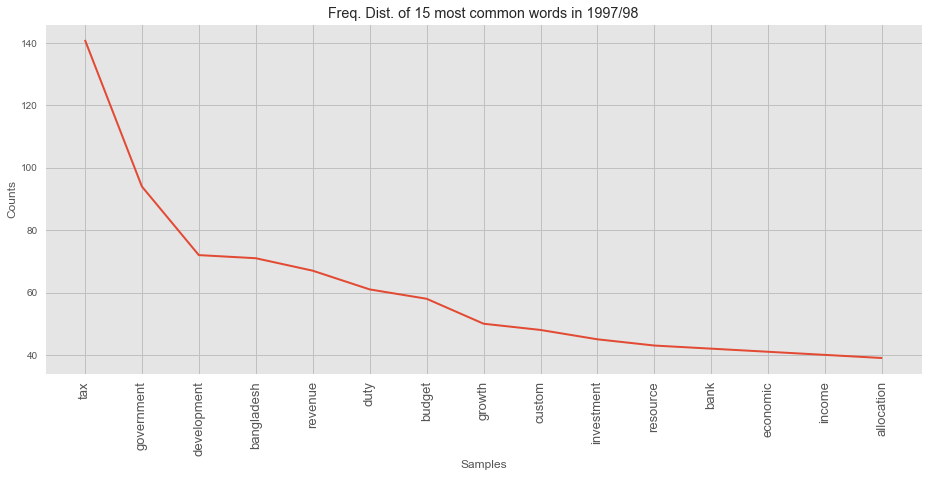

[('tax', 141),
 ('government', 94),
 ('development', 72),
 ('bangladesh', 71),
 ('revenue', 67),
 ('duty', 61),
 ('budget', 58),
 ('growth', 50),
 ('custom', 48),
 ('investment', 45),
 ('resource', 43),
 ('bank', 42),
 ('economic', 41),
 ('income', 40),
 ('allocation', 39)]

In [1205]:
#selecting dataset from local folder
budget_corpus9798 = budget_corpus.raw('speech_1997_98.txt')
#converting all texts to lowercase
budget_corpus9798_low = budget_corpus9798.lower()
#tokenizing words
word_tokens9798 = word_tokenize(budget_corpus9798_low)
#filtering out the stopwords
fltrd_sntnc9798 = [word for word in word_tokens9798 if not word in stop_words]
#lemmatizing the filtered words
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer9798 = WordNetLemmatizer()
lem_tokens9798 = [lemmatizer9798.lemmatize(word) for word in fltrd_sntnc9798]
#frequency disribution
fltrd_sntnc9798_dist= FreqDist(lem_tokens9798)
#plotting the distribution
plt.style.use('ggplot')
plt.xticks(fontsize=13)
fltrd_sntnc9798_dist.plot(15,title='Freq. Dist. of 15 most common words in 1997/98')
fltrd_sntnc9798_dist.most_common(15)

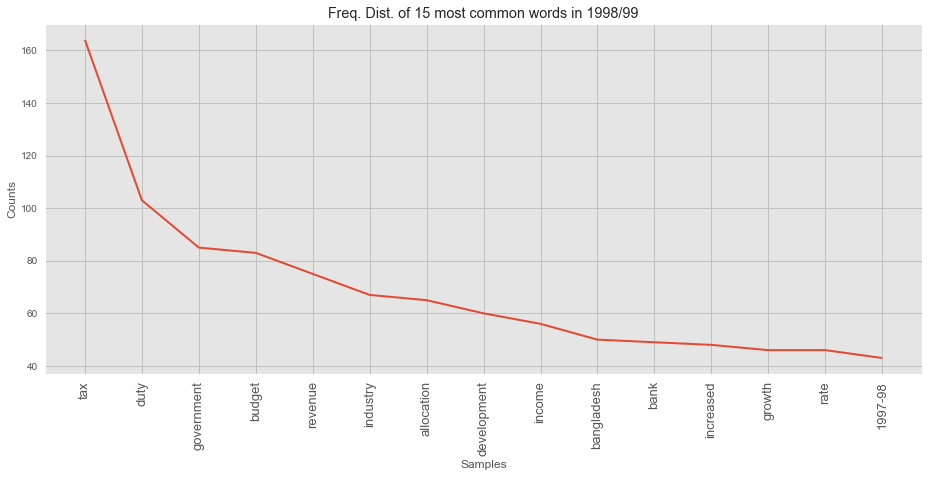

[('tax', 141),
 ('government', 94),
 ('development', 72),
 ('bangladesh', 71),
 ('revenue', 67),
 ('duty', 61),
 ('budget', 58),
 ('growth', 50),
 ('custom', 48),
 ('investment', 45),
 ('resource', 43),
 ('bank', 42),
 ('economic', 41),
 ('income', 40),
 ('allocation', 39)]

In [1206]:
budget_corpus9899 = budget_corpus.raw('speech_1998_99.txt')
budget_corpus9899_low = budget_corpus9899.lower()
word_tokens9899 = word_tokenize(budget_corpus9899_low)
fltrd_sntnc9899 = [word for word in word_tokens9899 if not word in stop_words]
fltrd_sntnc9899_dist= FreqDist(fltrd_sntnc9899)
lemmatizer9899 = WordNetLemmatizer()
lem_tokens9899 = [lemmatizer9899.lemmatize(word) for word in fltrd_sntnc9899]
fltrd_sntnc9899_dist= FreqDist(lem_tokens9899)
plt.xticks(fontsize=13)
fltrd_sntnc9899_dist.plot(15,title='Freq. Dist. of 15 most common words in 1998/99')
fltrd_sntnc9798_dist.most_common(15)

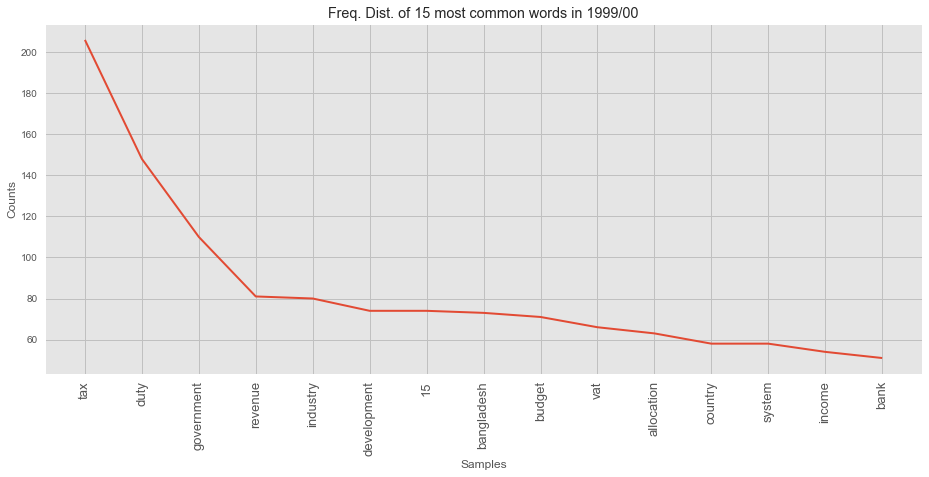

[('tax', 206),
 ('duty', 148),
 ('government', 110),
 ('revenue', 81),
 ('industry', 80),
 ('development', 74),
 ('15', 74),
 ('bangladesh', 73),
 ('budget', 71),
 ('vat', 66),
 ('allocation', 63),
 ('country', 58),
 ('system', 58),
 ('income', 54),
 ('bank', 51)]

In [1207]:
budget_corpus9900 = budget_corpus.raw('speech_1999_00.txt')
budget_corpus9900_low = budget_corpus9900.lower()
word_tokens9900 = word_tokenize(budget_corpus9900_low)
fltrd_sntnc9900 = [word for word in word_tokens9900 if not word in stop_words]
fltrd_sntnc9900_dist= FreqDist(fltrd_sntnc9900)
lemmatizer9900 = WordNetLemmatizer()
lem_tokens9900 = [lemmatizer9900.lemmatize(word) for word in fltrd_sntnc9900]
fltrd_sntnc9900_dist= FreqDist(lem_tokens9900)
plt.xticks(fontsize=13)
fltrd_sntnc9900_dist.plot(15,title='Freq. Dist. of 15 most common words in 1999/00')
fltrd_sntnc9900_dist.most_common(15)

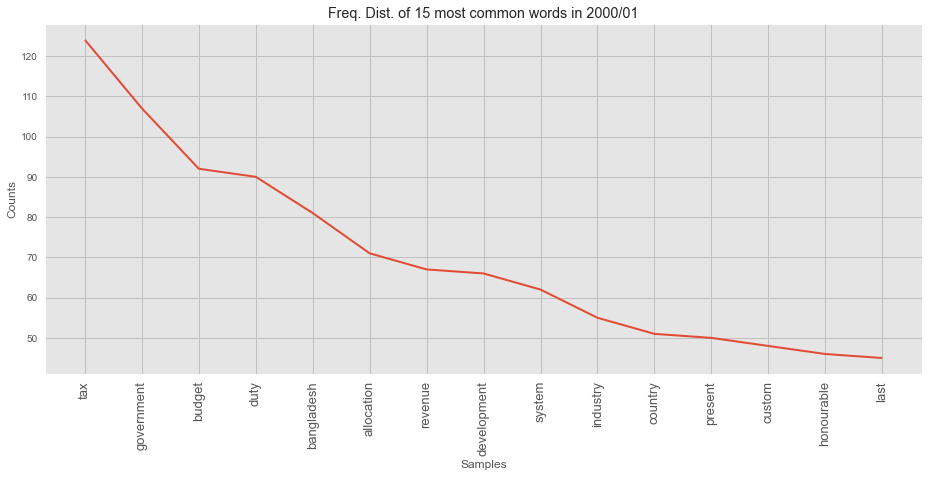

[('tax', 71),
 ('budget', 61),
 ('citizen', 52),
 ('thousand', 52),
 ('fellow', 49),
 ('development', 49),
 ('government', 47),
 ('allocation', 40),
 ('programme', 38),
 ('bangladesh', 34),
 ('country', 34),
 ('price', 32),
 ('duty', 32),
 ('revenue', 30),
 ('growth', 25)]

In [1208]:
budget_corpus0001 = budget_corpus.raw('speech_2000_01.txt')
budget_corpus0001_low = budget_corpus0001.lower()
word_tokens0001 = word_tokenize(budget_corpus0001_low)
fltrd_sntnc0001 = [word for word in word_tokens0001 if not word in stop_words]
fltrd_sntnc0001_dist= FreqDist(fltrd_sntnc0001)
lemmatizer0001 = WordNetLemmatizer()
lem_tokens0001 = [lemmatizer0001.lemmatize(word) for word in fltrd_sntnc0001]
fltrd_sntnc0001_dist= FreqDist(lem_tokens0001)
plt.xticks(fontsize=13)
#plt.rcParams['figure.figsize'] = [14, 6]
fltrd_sntnc0001_dist.plot(15,title='Freq. Dist. of 15 most common words in 2000/01')
fltrd_sntnc0708_dist.most_common(15)

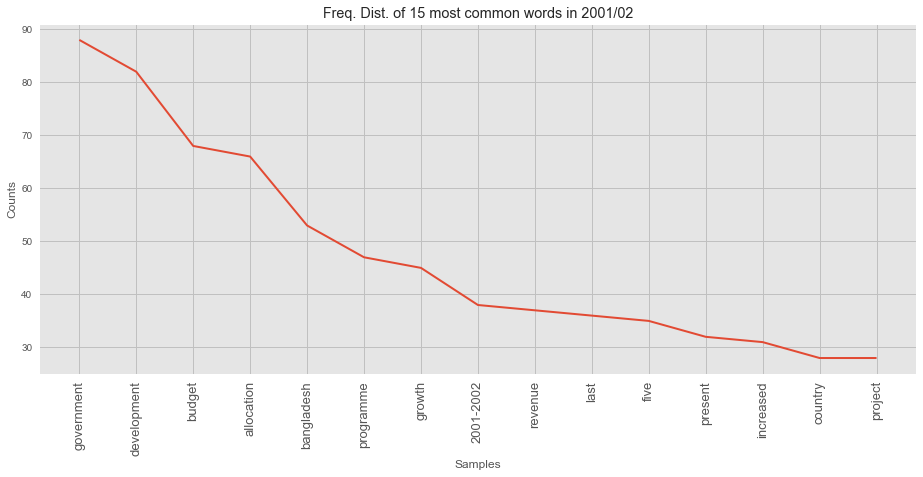

[('government', 88),
 ('development', 82),
 ('budget', 68),
 ('allocation', 66),
 ('bangladesh', 53),
 ('programme', 47),
 ('growth', 45),
 ('2001-2002', 38),
 ('revenue', 37),
 ('last', 36),
 ('five', 35),
 ('present', 32),
 ('increased', 31),
 ('country', 28),
 ('project', 28)]

In [1209]:
budget_corpus0102 = budget_corpus.raw('speech_2001_02.txt')
budget_corpus0102_low = budget_corpus0102.lower()
word_tokens0102 = word_tokenize(budget_corpus0102_low)
fltrd_sntnc0102 = [word for word in word_tokens0102 if not word in stop_words]
fltrd_sntnc0102_dist= FreqDist(fltrd_sntnc0102)
lemmatizer0102 = WordNetLemmatizer()
lem_tokens0102 = [lemmatizer0102.lemmatize(word) for word in fltrd_sntnc0102]
fltrd_sntnc0102_dist= FreqDist(lem_tokens0102)
plt.xticks(fontsize=13)
fltrd_sntnc0102_dist.plot(15,title='Freq. Dist. of 15 most common words in 2001/02')
fltrd_sntnc0102_dist.most_common(15)

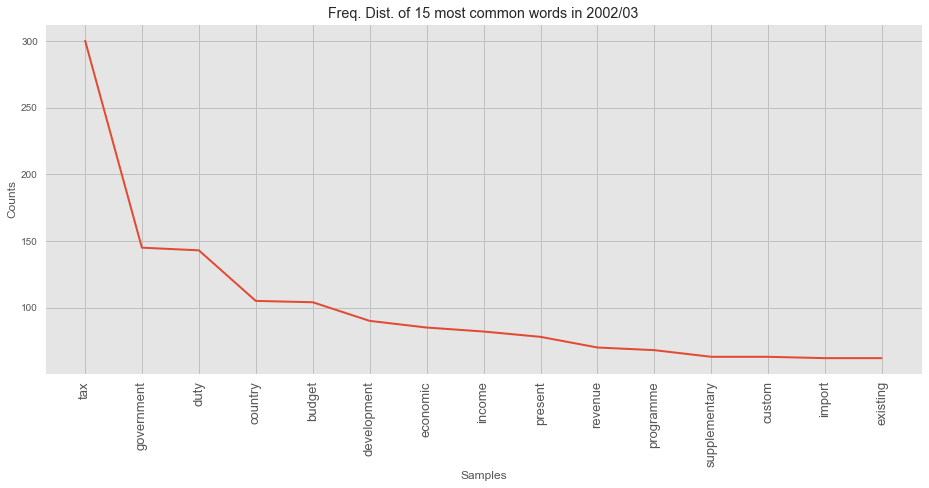

[('tax', 301),
 ('government', 145),
 ('duty', 143),
 ('country', 105),
 ('budget', 104),
 ('development', 90),
 ('economic', 85),
 ('income', 82),
 ('present', 78),
 ('revenue', 70),
 ('programme', 68),
 ('supplementary', 63),
 ('custom', 63),
 ('import', 62),
 ('existing', 62)]

In [1210]:
budget_corpus0203 = budget_corpus.raw('speech_2002_03.txt')
budget_corpus0203_low = budget_corpus0203.lower()
word_tokens0203 = word_tokenize(budget_corpus0203_low)
fltrd_sntnc0203 = [word for word in word_tokens0203 if not word in stop_words]
fltrd_sntnc0203_dist= FreqDist(fltrd_sntnc0203)
lemmatizer0203 = WordNetLemmatizer()
lem_tokens0203 = [lemmatizer0203.lemmatize(word) for word in fltrd_sntnc0203]
fltrd_sntnc0203_dist= FreqDist(lem_tokens0203)
plt.xticks(fontsize=13)
fltrd_sntnc0203_dist.plot(15,title='Freq. Dist. of 15 most common words in 2002/03')
fltrd_sntnc0203_dist.most_common(15)

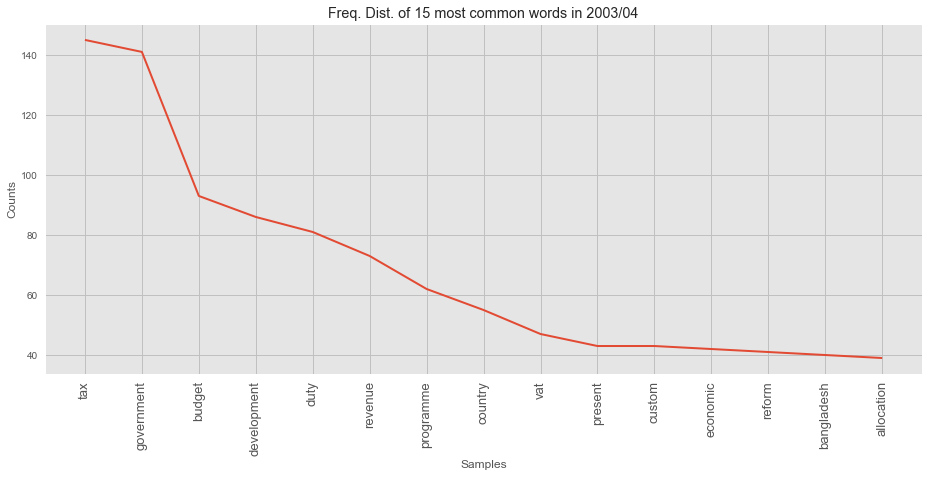

[('tax', 145),
 ('government', 141),
 ('budget', 93),
 ('development', 86),
 ('duty', 81),
 ('revenue', 73),
 ('programme', 62),
 ('country', 55),
 ('vat', 47),
 ('present', 43),
 ('custom', 43),
 ('economic', 42),
 ('reform', 41),
 ('bangladesh', 40),
 ('allocation', 39)]

In [1211]:
budget_corpus0304 = budget_corpus.raw('speech_2003_04.txt')
budget_corpus0304_low = budget_corpus0304.lower()
word_tokens0304 = word_tokenize(budget_corpus0304_low)
fltrd_sntnc0304 = [word for word in word_tokens0304 if not word in stop_words]
fltrd_sntnc0304_dist= FreqDist(fltrd_sntnc0304)
lemmatizer0304 = WordNetLemmatizer()
lem_tokens0304 = [lemmatizer0304.lemmatize(word) for word in fltrd_sntnc0304]
fltrd_sntnc0304_dist= FreqDist(lem_tokens0304)
plt.xticks(fontsize=13)
fltrd_sntnc0304_dist.plot(15,title='Freq. Dist. of 15 most common words in 2003/04')
fltrd_sntnc0304_dist.most_common(15)

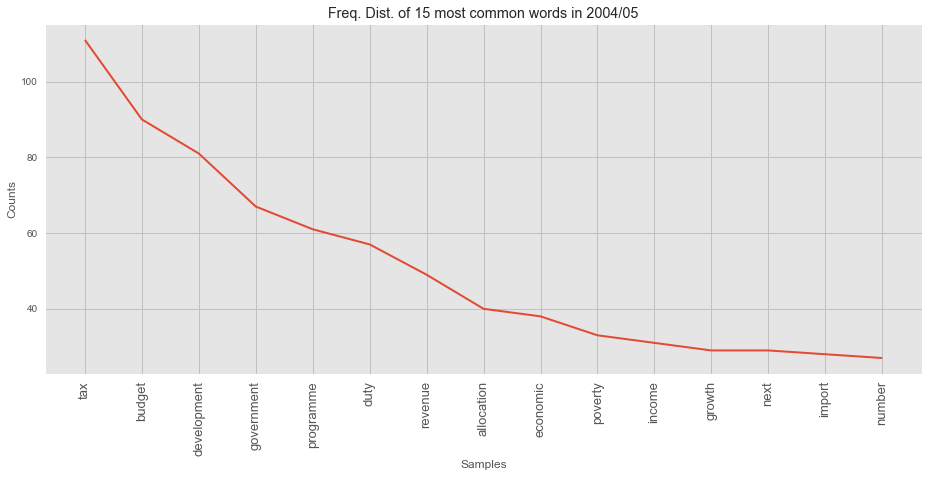

[('tax', 111),
 ('budget', 90),
 ('development', 81),
 ('government', 67),
 ('programme', 61),
 ('duty', 57),
 ('revenue', 49),
 ('allocation', 40),
 ('economic', 38),
 ('poverty', 33),
 ('income', 31),
 ('growth', 29),
 ('next', 29),
 ('import', 28),
 ('number', 27)]

In [1212]:
budget_corpus0405 = budget_corpus.raw('speech_2004_05.txt')
budget_corpus0405_low = budget_corpus0405.lower()
word_tokens0405 = word_tokenize(budget_corpus0405_low)
fltrd_sntnc0405 = [word for word in word_tokens0405 if not word in stop_words]
fltrd_sntnc0405_dist= FreqDist(fltrd_sntnc0405)
lemmatizer0405 = WordNetLemmatizer()
lem_tokens0405 = [lemmatizer0405.lemmatize(word) for word in fltrd_sntnc0405]
fltrd_sntnc0405_dist= FreqDist(lem_tokens0405)
plt.xticks(fontsize=13)
fltrd_sntnc0405_dist.plot(15,title='Freq. Dist. of 15 most common words in 2004/05')
fltrd_sntnc0405_dist.most_common(15)

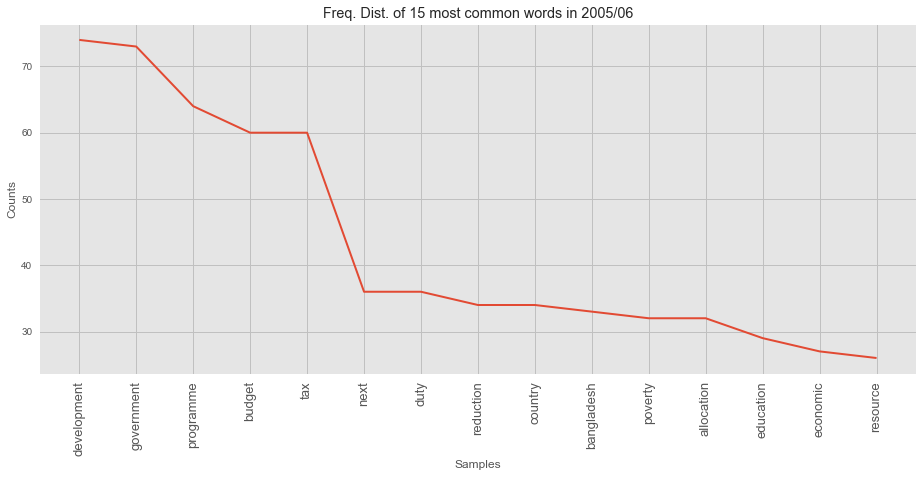

[('development', 74),
 ('government', 73),
 ('programme', 64),
 ('budget', 60),
 ('tax', 60),
 ('next', 36),
 ('duty', 36),
 ('reduction', 34),
 ('country', 34),
 ('bangladesh', 33),
 ('poverty', 32),
 ('allocation', 32),
 ('education', 29),
 ('economic', 27),
 ('resource', 26)]

In [1213]:
budget_corpus0506 = budget_corpus.raw('speech_2005_06.txt')
budget_corpus0506_low = budget_corpus0506.lower()
word_tokens0506 = word_tokenize(budget_corpus0506_low)
fltrd_sntnc0506 = [word for word in word_tokens0506 if not word in stop_words]
fltrd_sntnc0506_dist= FreqDist(fltrd_sntnc0506)
lemmatizer0506 = WordNetLemmatizer()
lem_tokens0506 = [lemmatizer0506.lemmatize(word) for word in fltrd_sntnc0506]
fltrd_sntnc0506_dist= FreqDist(lem_tokens0506)
plt.xticks(fontsize=13)
fltrd_sntnc0506_dist.plot(15,title='Freq. Dist. of 15 most common words in 2005/06')
fltrd_sntnc0506_dist.most_common(15)

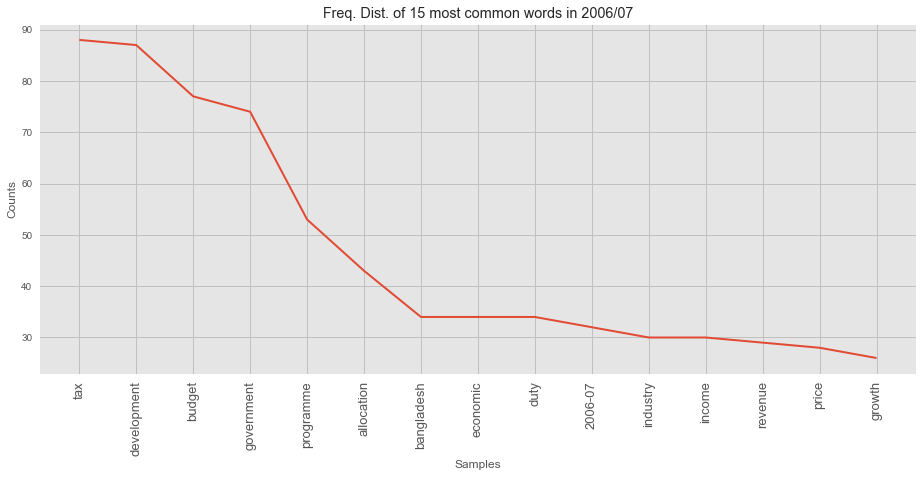

[('tax', 88),
 ('development', 87),
 ('budget', 77),
 ('government', 74),
 ('programme', 53),
 ('allocation', 43),
 ('bangladesh', 34),
 ('economic', 34),
 ('duty', 34),
 ('2006-07', 32),
 ('industry', 30),
 ('income', 30),
 ('revenue', 29),
 ('price', 28),
 ('growth', 26)]

In [1214]:
budget_corpus0607 = budget_corpus.raw('speech_2006_07.txt')
budget_corpus0607_low = budget_corpus0607.lower()
word_tokens0607 = word_tokenize(budget_corpus0607_low)
fltrd_sntnc0607 = [word for word in word_tokens0607 if not word in stop_words]
fltrd_sntnc0607_dist= FreqDist(fltrd_sntnc0607)
lemmatizer0607 = WordNetLemmatizer()
lem_tokens0607 = [lemmatizer0607.lemmatize(word) for word in fltrd_sntnc0607]
fltrd_sntnc0607_dist= FreqDist(lem_tokens0607)
plt.xticks(fontsize=13)
fltrd_sntnc0607_dist.plot(15,title='Freq. Dist. of 15 most common words in 2006/07')
fltrd_sntnc0607_dist.most_common(15)

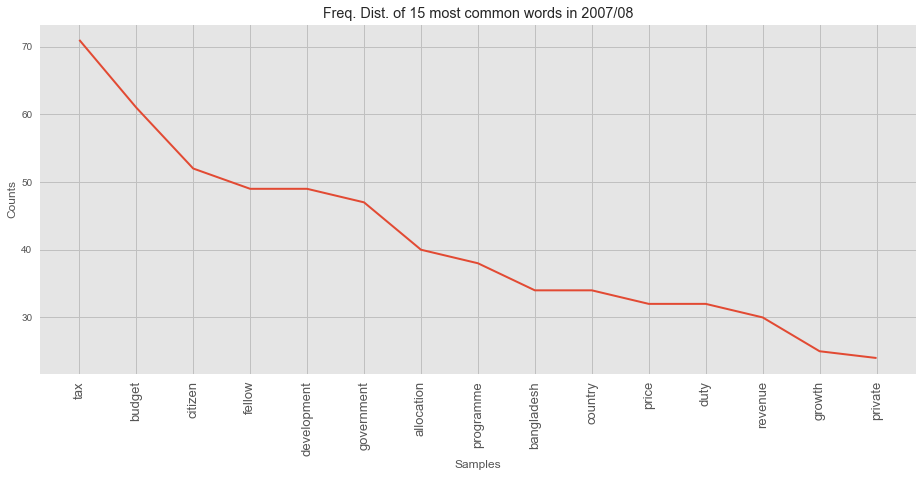

[('tax', 71),
 ('budget', 61),
 ('citizen', 52),
 ('fellow', 49),
 ('development', 49),
 ('government', 47),
 ('allocation', 40),
 ('programme', 38),
 ('bangladesh', 34),
 ('country', 34),
 ('price', 32),
 ('duty', 32),
 ('revenue', 30),
 ('growth', 25),
 ('private', 24)]

In [1215]:
budget_corpus0708 = budget_corpus.raw('speech_2007_08.txt')
budget_corpus0708_low = budget_corpus0708.lower()
word_tokens0708 = word_tokenize(budget_corpus0708_low)
fltrd_sntnc0708 = [word for word in word_tokens0708 if not word in stop_words]
fltrd_sntnc0708_dist= FreqDist(fltrd_sntnc0708)
lemmatizer0708 = WordNetLemmatizer()
lem_tokens0708 = [lemmatizer0708.lemmatize(word) for word in fltrd_sntnc0708]
fltrd_sntnc0708_dist= FreqDist(lem_tokens0708)
plt.xticks(fontsize=13)
fltrd_sntnc0708_dist.plot(15, title='Freq. Dist. of 15 most common words in 2007/08')
fltrd_sntnc0708_dist.most_common(15)

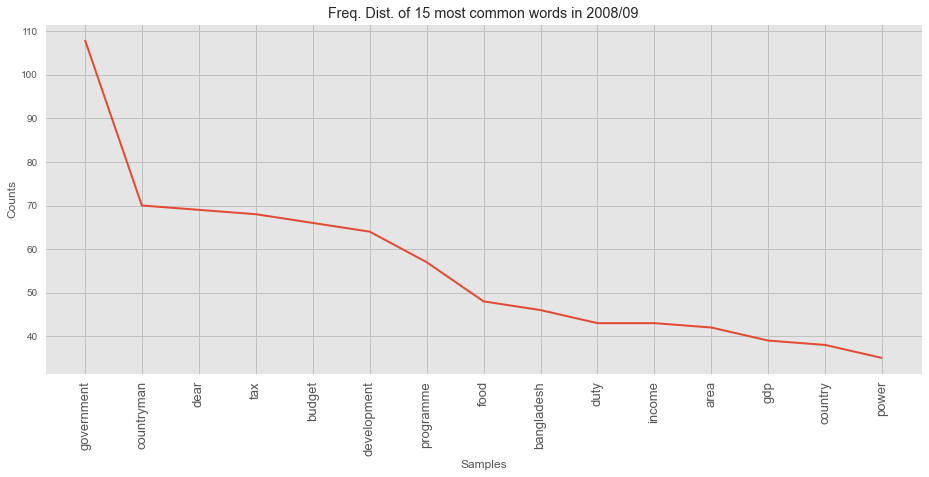

[('government', 108),
 ('countryman', 70),
 ('dear', 69),
 ('tax', 68),
 ('budget', 66),
 ('development', 64),
 ('programme', 57),
 ('food', 48),
 ('bangladesh', 46),
 ('duty', 43),
 ('income', 43),
 ('area', 42),
 ('gdp', 39),
 ('country', 38),
 ('power', 35)]

In [1216]:
budget_corpus0809 = budget_corpus.raw('speech_2008_09.txt')
budget_corpus0809_low = budget_corpus0809.lower()
word_tokens0809 = word_tokenize(budget_corpus0809_low)
fltrd_sntnc0809 = [word for word in word_tokens0809 if not word in stop_words]
fltrd_sntnc0809_dist= FreqDist(fltrd_sntnc0809)
lemmatizer0809 = WordNetLemmatizer()
lem_tokens0809 = [lemmatizer0809.lemmatize(word) for word in fltrd_sntnc0809]
fltrd_sntnc0809_dist= FreqDist(lem_tokens0809)
plt.xticks(fontsize=13)
fltrd_sntnc0809_dist.plot(15, title='Freq. Dist. of 15 most common words in 2008/09')
fltrd_sntnc0809_dist.most_common(15)

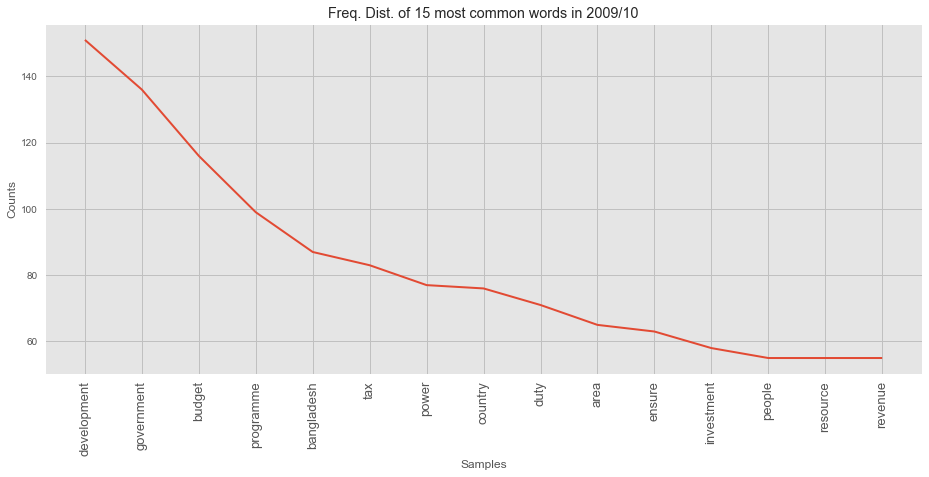

[('development', 151),
 ('government', 136),
 ('budget', 116),
 ('programme', 99),
 ('bangladesh', 87),
 ('tax', 83),
 ('power', 77),
 ('country', 76),
 ('duty', 71),
 ('area', 65),
 ('ensure', 63),
 ('investment', 58),
 ('people', 55),
 ('resource', 55),
 ('revenue', 55)]

In [1217]:
budget_corpus0910 = budget_corpus.raw('speech_2009_10.txt')
budget_corpus0910_low = budget_corpus0910.lower()
word_tokens0910 = word_tokenize(budget_corpus0910_low)
fltrd_sntnc0910 = [word for word in word_tokens0910 if not word in stop_words]
fltrd_sntnc0910_dist= FreqDist(fltrd_sntnc0910)
lemmatizer0910 = WordNetLemmatizer()
lem_tokens0910 = [lemmatizer0910.lemmatize(word) for word in fltrd_sntnc0910]
fltrd_sntnc0910_dist= FreqDist(lem_tokens0910)
plt.xticks(fontsize=13)
fltrd_sntnc0910_dist.plot(15, title='Freq. Dist. of 15 most common words in 2009/10')
fltrd_sntnc0910_dist.most_common(15)

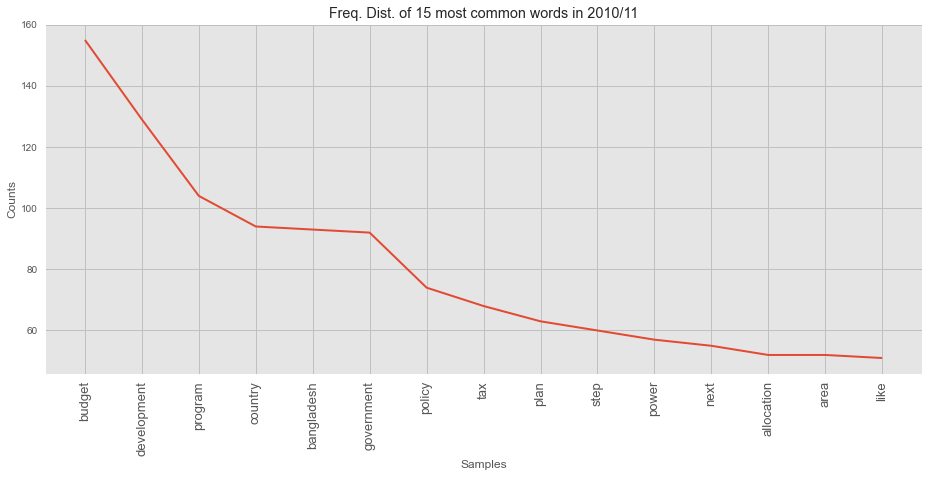

[('budget', 155),
 ('development', 129),
 ('program', 104),
 ('country', 94),
 ('bangladesh', 93),
 ('government', 92),
 ('policy', 74),
 ('tax', 68),
 ('plan', 63),
 ('step', 60),
 ('power', 57),
 ('next', 55),
 ('allocation', 52),
 ('area', 52),
 ('like', 51)]

In [1218]:
budget_corpus1011 = budget_corpus.raw('speech_2010_11.txt')
budget_corpus1011_low = budget_corpus1011.lower()
word_tokens1011 = word_tokenize(budget_corpus1011_low)
fltrd_sntnc1011 = [word for word in word_tokens1011 if not word in stop_words]
fltrd_sntnc1011_dist= FreqDist(fltrd_sntnc1011)
lemmatizer1011 = WordNetLemmatizer()
lem_tokens1011 = [lemmatizer1011.lemmatize(word) for word in fltrd_sntnc1011]
fltrd_sntnc1011_dist= FreqDist(lem_tokens1011)
plt.xticks(fontsize=13)
fltrd_sntnc1011_dist.plot(15, title='Freq. Dist. of 15 most common words in 2010/11')
fltrd_sntnc1011_dist.most_common(15)

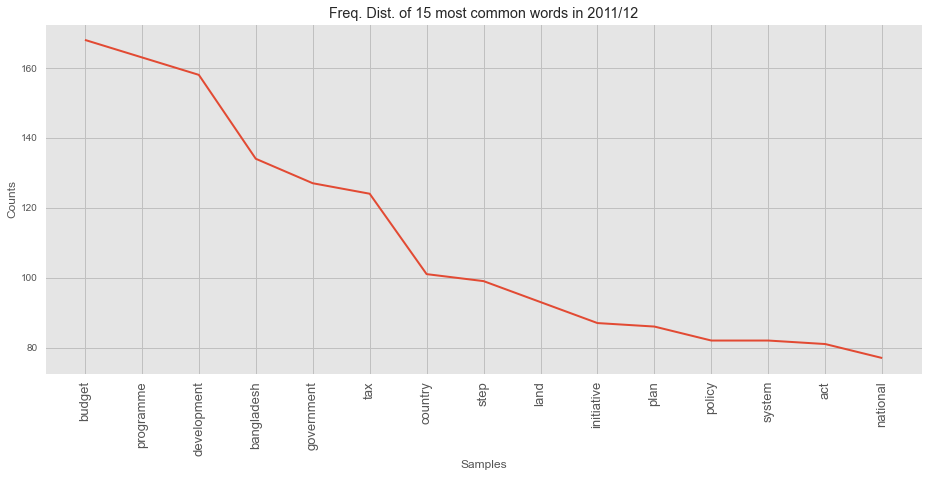

[('budget', 168),
 ('programme', 163),
 ('development', 158),
 ('bangladesh', 134),
 ('government', 127),
 ('tax', 124),
 ('country', 101),
 ('step', 99),
 ('land', 93),
 ('initiative', 87),
 ('plan', 86),
 ('policy', 82),
 ('system', 82),
 ('act', 81),
 ('national', 77)]

In [1219]:
budget_corpus1112 = budget_corpus.raw('speech_2011_12.txt')
budget_corpus1112_low = budget_corpus1112.lower()
word_tokens1112 = word_tokenize(budget_corpus1112_low)
fltrd_sntnc1112 = [word for word in word_tokens1112 if not word in stop_words]
fltrd_sntnc1112_dist= FreqDist(fltrd_sntnc1112)
lemmatizer1112 = WordNetLemmatizer()
lem_tokens1112 = [lemmatizer1112.lemmatize(word) for word in fltrd_sntnc1112]
fltrd_sntnc1112_dist= FreqDist(lem_tokens1112)
plt.xticks(fontsize=13)
fltrd_sntnc1112_dist.plot(15, title='Freq. Dist. of 15 most common words in 2011/12')
fltrd_sntnc1112_dist.most_common(15)

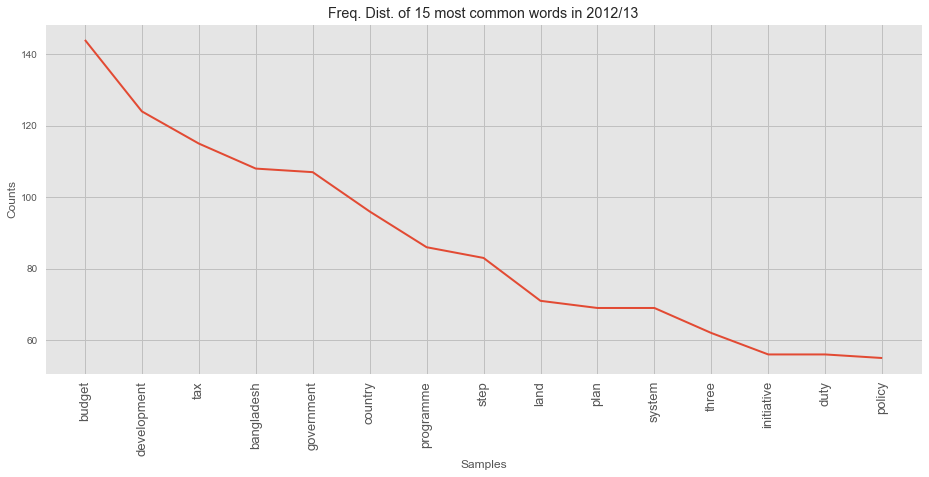

[('budget', 144),
 ('development', 124),
 ('tax', 115),
 ('bangladesh', 108),
 ('government', 107),
 ('country', 96),
 ('programme', 86),
 ('step', 83),
 ('land', 71),
 ('plan', 69),
 ('system', 69),
 ('three', 62),
 ('initiative', 56),
 ('duty', 56),
 ('policy', 55)]

In [1220]:
budget_corpus1213 = budget_corpus.raw('speech_2012_13.txt')
budget_corpus1213_low = budget_corpus1213.lower()
word_tokens1213 = word_tokenize(budget_corpus1213_low)
fltrd_sntnc1213 = [word for word in word_tokens1213 if not word in stop_words]
fltrd_sntnc1213_dist= FreqDist(fltrd_sntnc1213)
lemmatizer1213 = WordNetLemmatizer()
lem_tokens1213 = [lemmatizer1213.lemmatize(word) for word in fltrd_sntnc1213]
fltrd_sntnc1213_dist= FreqDist(lem_tokens1213)
plt.xticks(fontsize=13)
fltrd_sntnc1213_dist.plot(15, title='Freq. Dist. of 15 most common words in 2012/13')
fltrd_sntnc1213_dist.most_common(15)

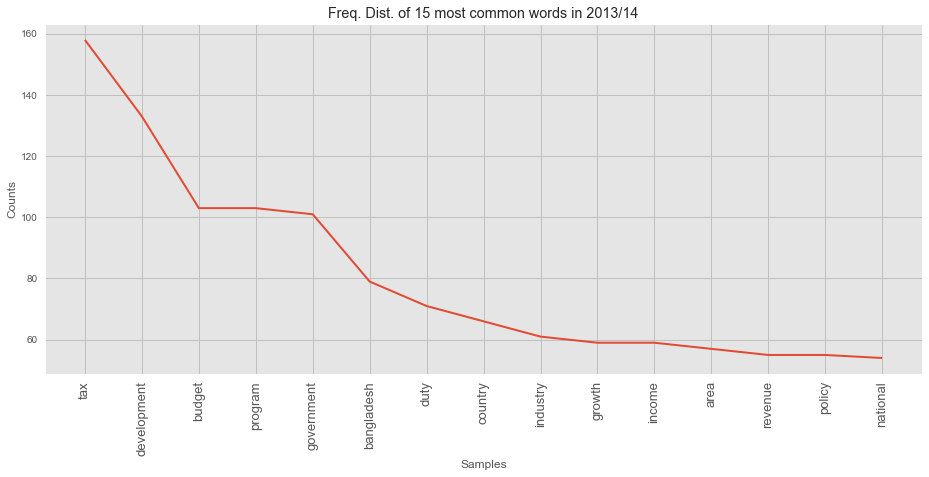

[('tax', 158),
 ('development', 133),
 ('budget', 103),
 ('program', 103),
 ('government', 101),
 ('bangladesh', 79),
 ('duty', 71),
 ('country', 66),
 ('industry', 61),
 ('growth', 59),
 ('income', 59),
 ('area', 57),
 ('revenue', 55),
 ('policy', 55),
 ('national', 54)]

In [1221]:
budget_corpus1314 = budget_corpus.raw('speech_2013_14.txt')
budget_corpus1314_low = budget_corpus1314.lower()
word_tokens1314 = word_tokenize(budget_corpus1314_low)
fltrd_sntnc1314 = [word for word in word_tokens1314 if not word in stop_words]
fltrd_sntnc1314_dist= FreqDist(fltrd_sntnc1314)
lemmatizer1314 = WordNetLemmatizer()
lem_tokens1314 = [lemmatizer1314.lemmatize(word) for word in fltrd_sntnc1314]
fltrd_sntnc1314_dist= FreqDist(lem_tokens1314)
plt.xticks(fontsize=13)
fltrd_sntnc1314_dist.plot(15, title='Freq. Dist. of 15 most common words in 2013/14')
fltrd_sntnc1314_dist.most_common(15)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 61656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 61656 missing from current font.
  font.set_text(s, 0, flags=flags)


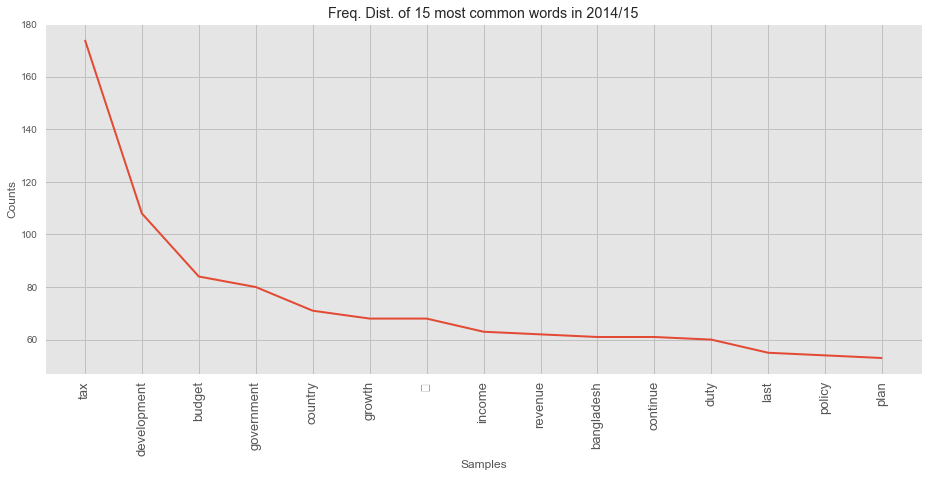

[('tax', 174),
 ('development', 108),
 ('budget', 84),
 ('government', 80),
 ('country', 71),
 ('growth', 68),
 ('\uf0d8', 68),
 ('income', 63),
 ('revenue', 62),
 ('bangladesh', 61),
 ('continue', 61),
 ('duty', 60),
 ('last', 55),
 ('policy', 54),
 ('plan', 53)]

In [1222]:
budget_corpus1415 = budget_corpus.raw('speech_2014_15.txt')
budget_corpus1415_low = budget_corpus1415.lower()
word_tokens1415 = word_tokenize(budget_corpus1415_low)
fltrd_sntnc1415 = [word for word in word_tokens1415 if not word in stop_words]
fltrd_sntnc1415_dist= FreqDist(fltrd_sntnc1415)
lemmatizer1415 = WordNetLemmatizer()
lem_tokens1415 = [lemmatizer1415.lemmatize(word) for word in fltrd_sntnc1415]
fltrd_sntnc1415_dist= FreqDist(lem_tokens1415)
plt.xticks(fontsize=13)
fltrd_sntnc1415_dist.plot(15, title='Freq. Dist. of 15 most common words in 2014/15')
fltrd_sntnc1415_dist.most_common(15)

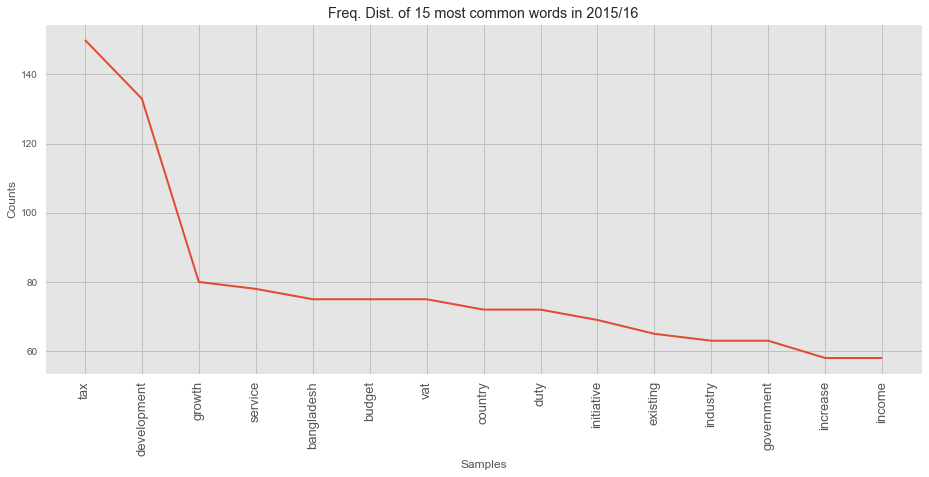

[('tax', 150),
 ('development', 133),
 ('growth', 80),
 ('service', 78),
 ('bangladesh', 75),
 ('budget', 75),
 ('vat', 75),
 ('country', 72),
 ('duty', 72),
 ('initiative', 69),
 ('existing', 65),
 ('industry', 63),
 ('government', 63),
 ('increase', 58),
 ('income', 58)]

In [1223]:
budget_corpus1516 = budget_corpus.raw('speech_2015_16.txt')
budget_corpus1516_low = budget_corpus1516.lower()
word_tokens1516 = word_tokenize(budget_corpus1516_low)
fltrd_sntnc1516 = [word for word in word_tokens1516 if not word in stop_words]
fltrd_sntnc1516_dist= FreqDist(fltrd_sntnc1516)
lemmatizer1516 = WordNetLemmatizer()
lem_tokens1516 = [lemmatizer1516.lemmatize(word) for word in fltrd_sntnc1516]
fltrd_sntnc1516_dist= FreqDist(lem_tokens1516)
plt.xticks(fontsize=13)
fltrd_sntnc1516_dist.plot(15, title='Freq. Dist. of 15 most common words in 2015/16')
fltrd_sntnc1516_dist.most_common(15)

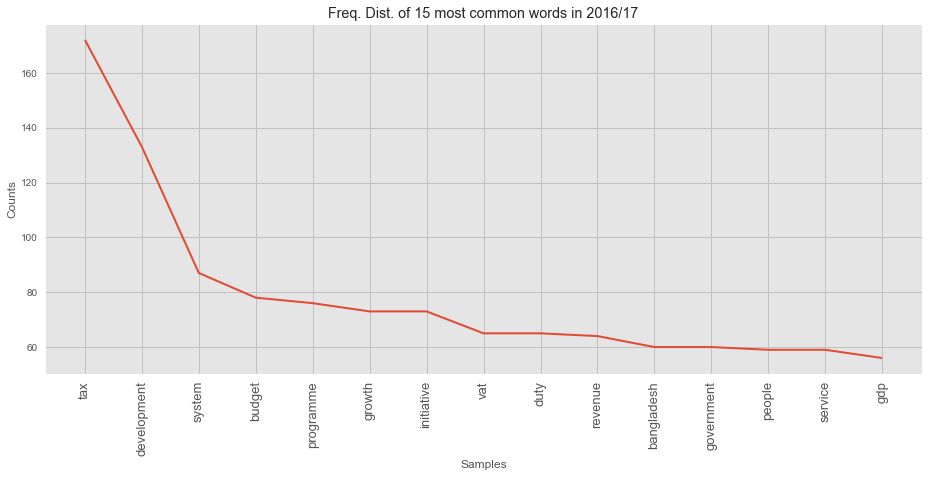

[('tax', 172),
 ('development', 133),
 ('system', 87),
 ('budget', 78),
 ('programme', 76),
 ('growth', 73),
 ('initiative', 73),
 ('vat', 65),
 ('duty', 65),
 ('revenue', 64),
 ('bangladesh', 60),
 ('government', 60),
 ('people', 59),
 ('service', 59),
 ('gdp', 56)]

In [1224]:
budget_corpus1617 = budget_corpus.raw('speech_2016_17.txt')
budget_corpus1617_low = budget_corpus1617.lower()
word_tokens1617 = word_tokenize(budget_corpus1617_low)
fltrd_sntnc1617 = [word for word in word_tokens1617 if not word in stop_words]
fltrd_sntnc1617_dist= FreqDist(fltrd_sntnc1617)
lemmatizer1617 = WordNetLemmatizer()
lem_tokens1617 = [lemmatizer1617.lemmatize(word) for word in fltrd_sntnc1617]
fltrd_sntnc1617_dist= FreqDist(lem_tokens1617)
plt.xticks(fontsize=13)
fltrd_sntnc1617_dist.plot(15, title='Freq. Dist. of 15 most common words in 2016/17')
fltrd_sntnc1617_dist.most_common(15)

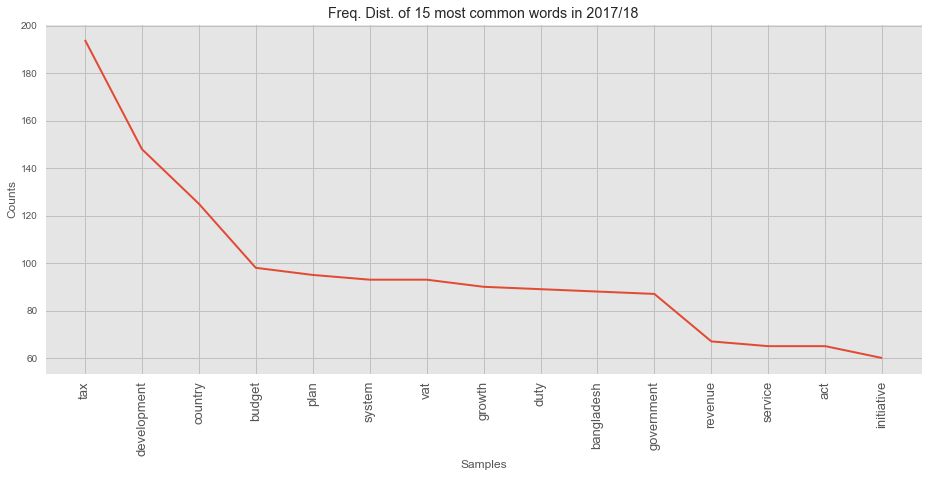

[('tax', 194),
 ('development', 148),
 ('country', 125),
 ('budget', 98),
 ('plan', 95),
 ('system', 93),
 ('vat', 93),
 ('growth', 90),
 ('duty', 89),
 ('bangladesh', 88),
 ('government', 87),
 ('revenue', 67),
 ('service', 65),
 ('act', 65),
 ('initiative', 60)]

In [1225]:
budget_corpus1718 = budget_corpus.raw('speech_2017_18.txt')
budget_corpus1718_low = budget_corpus1718.lower()
word_tokens1718 = word_tokenize(budget_corpus1718_low)
fltrd_sntnc1718 = [word for word in word_tokens1718 if not word in stop_words]
fltrd_sntnc1718_dist= FreqDist(fltrd_sntnc1718)
lemmatizer1718 = WordNetLemmatizer()
lem_tokens1718 = [lemmatizer1718.lemmatize(word) for word in fltrd_sntnc1718]
fltrd_sntnc1718_dist= FreqDist(lem_tokens1718)
plt.xticks(fontsize=13)
fltrd_sntnc1718_dist.plot(15, title='Freq. Dist. of 15 most common words in 2017/18')
fltrd_sntnc1718_dist.most_common(15)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 61692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 61692 missing from current font.
  font.set_text(s, 0, flags=flags)


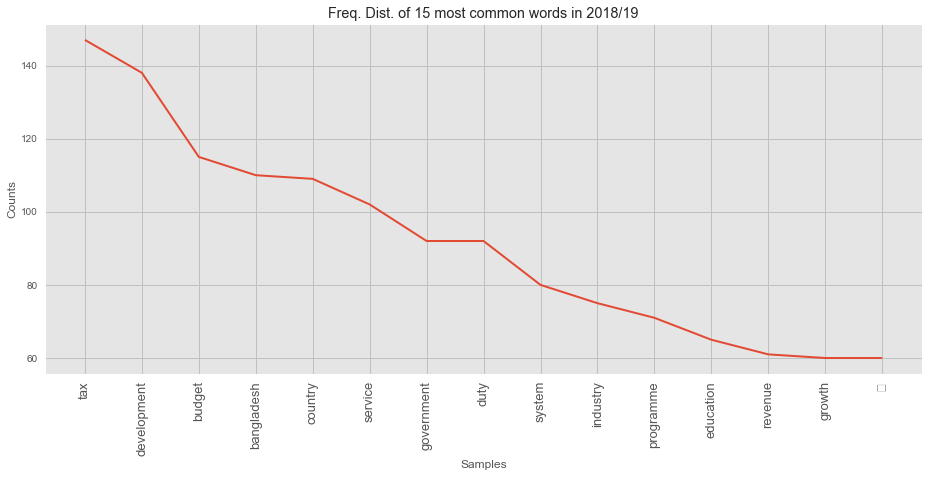

[('tax', 147),
 ('development', 138),
 ('budget', 115),
 ('bangladesh', 110),
 ('country', 109),
 ('service', 102),
 ('government', 92),
 ('duty', 92),
 ('system', 80),
 ('industry', 75),
 ('programme', 71),
 ('education', 65),
 ('revenue', 61),
 ('growth', 60),
 ('\uf0fc', 60)]

In [1226]:
budget_corpus1819 = budget_corpus.raw('speech_2018_19.txt')
budget_corpus1819_low = budget_corpus1819.lower()
word_tokens1819 = word_tokenize(budget_corpus1819_low)
fltrd_sntnc1819 = [word for word in word_tokens1819 if not word in stop_words]
fltrd_sntnc1819_dist= FreqDist(fltrd_sntnc1819)
lemmatizer1819 = WordNetLemmatizer()
lem_tokens1819 = [lemmatizer1819.lemmatize(word) for word in fltrd_sntnc1819]
fltrd_sntnc1819_dist= FreqDist(lem_tokens1819)
plt.xticks(fontsize=13)
fltrd_sntnc1819_dist.plot(15, title='Freq. Dist. of 15 most common words in 2018/19')
fltrd_sntnc1819_dist.most_common(15)

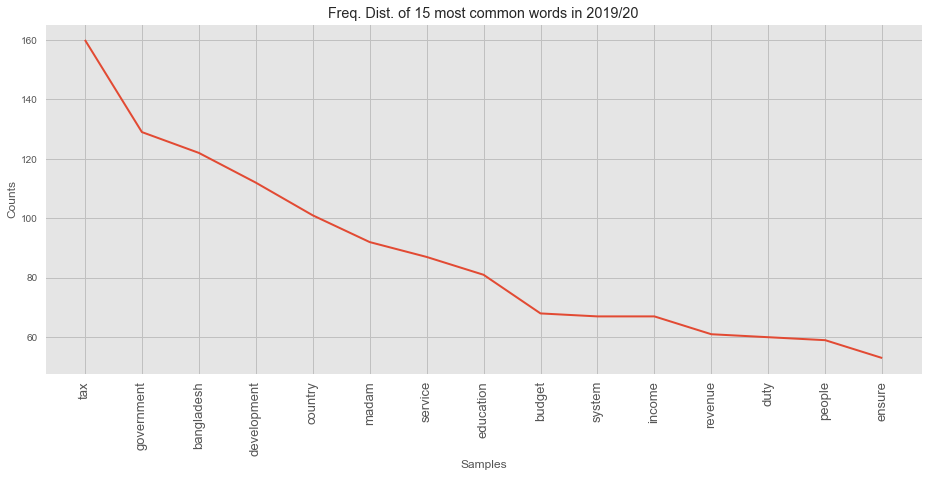

[('tax', 160),
 ('government', 129),
 ('bangladesh', 122),
 ('development', 112),
 ('country', 101),
 ('madam', 92),
 ('service', 87),
 ('education', 81),
 ('budget', 68),
 ('system', 67),
 ('income', 67),
 ('revenue', 61),
 ('duty', 60),
 ('people', 59),
 ('ensure', 53)]

In [1227]:
budget_corpus1920 = budget_corpus.raw('speech_2019_20.txt')
budget_corpus1920_low = budget_corpus1920.lower()
word_tokens1920 = word_tokenize(budget_corpus1920_low)
fltrd_sntnc1920 = [word for word in word_tokens1920 if not word in stop_words]
fltrd_sntnc1920_dist= FreqDist(fltrd_sntnc1920)
lemmatizer1920 = WordNetLemmatizer()
lem_tokens1920 = [lemmatizer1920.lemmatize(word) for word in fltrd_sntnc1920]
fltrd_sntnc1920_dist= FreqDist(lem_tokens1920)
plt.xticks(fontsize=13)
fltrd_sntnc1920_dist.plot(15, title='Freq. Dist. of 15 most common words in 2019/20')
fltrd_sntnc1920_dist.most_common(15)

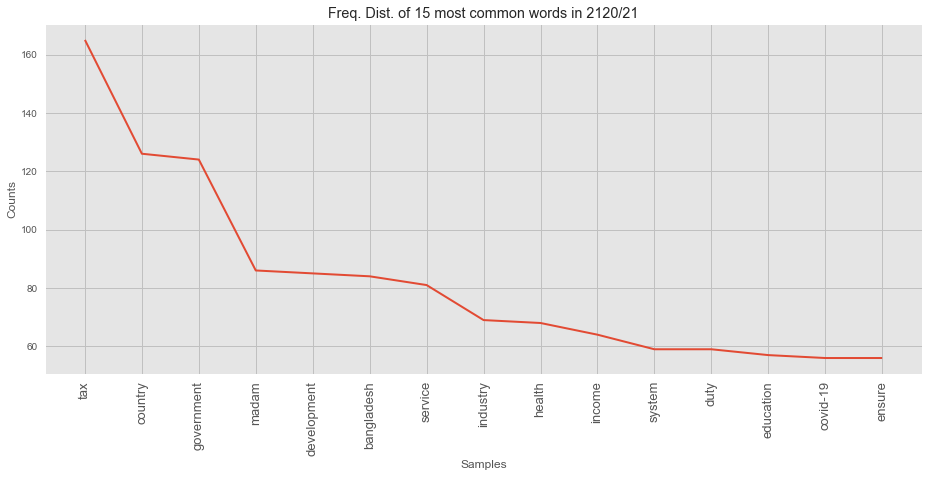

[('tax', 165),
 ('country', 126),
 ('government', 124),
 ('madam', 86),
 ('development', 85),
 ('bangladesh', 84),
 ('service', 81),
 ('industry', 69),
 ('health', 68),
 ('income', 64),
 ('system', 59),
 ('duty', 59),
 ('education', 57),
 ('covid-19', 56),
 ('ensure', 56)]

In [1228]:
budget_corpus2021 = budget_corpus.raw('speech_2020_21.txt')
budget_corpus2021_low = budget_corpus2021.lower()
word_tokens2021 = word_tokenize(budget_corpus2021_low)
fltrd_sntnc2021 = [word for word in word_tokens2021 if not word in stop_words]
fltrd_sntnc2021_dist= FreqDist(fltrd_sntnc2021)
lemmatizer2021 = WordNetLemmatizer()
lem_tokens2021 = [lemmatizer2021.lemmatize(word) for word in fltrd_sntnc2021]
fltrd_sntnc2021_dist= FreqDist(lem_tokens2021)
plt.xticks(fontsize=13)
fltrd_sntnc2021_dist.plot(15, title='Freq. Dist. of 15 most common words in 2120/21')
fltrd_sntnc2021_dist.most_common(15)

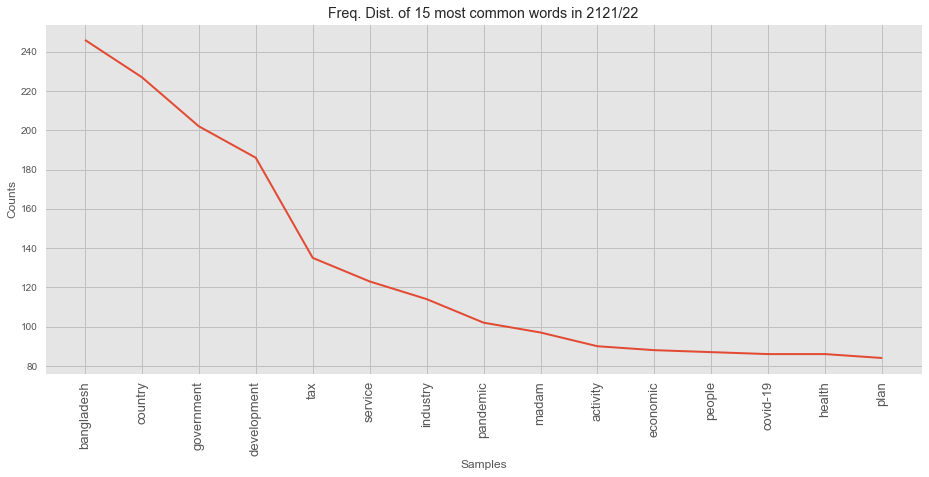

[('bangladesh', 246),
 ('country', 227),
 ('government', 202),
 ('development', 186),
 ('tax', 135),
 ('service', 123),
 ('industry', 114),
 ('pandemic', 102),
 ('madam', 97),
 ('activity', 90),
 ('economic', 88),
 ('people', 87),
 ('covid-19', 86),
 ('health', 86),
 ('plan', 84)]

In [1229]:
budget_corpus2122 = budget_corpus.raw('speech_2021_22.txt')
budget_corpus2122_low = budget_corpus2122.lower()
word_tokens2122 = word_tokenize(budget_corpus2122_low)
fltrd_sntnc2122 = [word for word in word_tokens2122 if not word in stop_words]
fltrd_sntnc2122_dist= FreqDist(fltrd_sntnc2122)
lemmatizer2122 = WordNetLemmatizer()
lem_tokens2122 = [lemmatizer2122.lemmatize(word) for word in fltrd_sntnc2122]
fltrd_sntnc2122_dist= FreqDist(lem_tokens2122)
plt.xticks(fontsize=13)
fltrd_sntnc2122_dist.plot(15, title='Freq. Dist. of 15 most common words in 2121/22')
fltrd_sntnc2122_dist.most_common(15)

In [1230]:
fil= fltrd_sntnc2122_dist.most_common(15)

In [1231]:
type(lem_tokens2122)

list

In [1232]:
total = (lem_tokens9798 + lem_tokens9899 + lem_tokens9900 + lem_tokens0001 + lem_tokens0102 + lem_tokens0203 + lem_tokens0304 +
         lem_tokens0405 + lem_tokens0506 + lem_tokens0607 + lem_tokens0708 + lem_tokens0809 + lem_tokens0910 + lem_tokens1011 +
         lem_tokens1112 + lem_tokens1213 + lem_tokens1314 + lem_tokens1415 + lem_tokens1516 + lem_tokens1617 + lem_tokens1718 +
         lem_tokens1819 + lem_tokens1920 + lem_tokens2021 + lem_tokens2122)

In [1233]:
total_dist= FreqDist(total)
print(len(total))

337784


In [1234]:
total_corpus = (budget_corpus9798_low + budget_corpus9899_low + budget_corpus9900_low + budget_corpus0001_low + 
                budget_corpus0102_low + budget_corpus0203_low + budget_corpus0304_low + budget_corpus0405_low +
                budget_corpus0506_low + budget_corpus0607_low + budget_corpus0708_low + budget_corpus0809_low + 
               budget_corpus0910_low + budget_corpus1011_low + budget_corpus1112_low + budget_corpus1213_low +
               budget_corpus1314_low + budget_corpus1415_low + budget_corpus1516_low + budget_corpus1617_low + 
               budget_corpus1718_low + budget_corpus1819_low + budget_corpus1920_low + budget_corpus2021_low +
               budget_corpus2122_low)

In [1235]:
type(total_corpus)

str

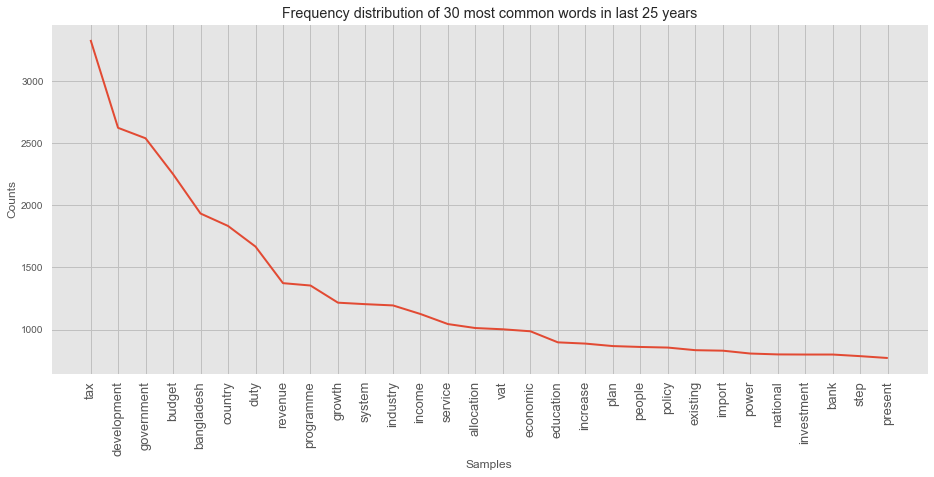

[('tax', 3330),
 ('development', 2623),
 ('government', 2539),
 ('budget', 2251),
 ('bangladesh', 1934),
 ('country', 1834),
 ('duty', 1668),
 ('revenue', 1374),
 ('programme', 1355),
 ('growth', 1217),
 ('system', 1205),
 ('industry', 1195),
 ('income', 1126),
 ('service', 1045),
 ('allocation', 1013),
 ('vat', 1003),
 ('economic', 987),
 ('education', 898),
 ('increase', 888),
 ('plan', 868),
 ('people', 861),
 ('policy', 856),
 ('existing', 835),
 ('import', 831),
 ('power', 808),
 ('national', 801),
 ('investment', 800),
 ('bank', 800),
 ('step', 787),
 ('present', 772)]

In [1236]:
plt.xticks(fontsize=13)
total_dist.plot(30, title='Frequency distribution of 30 most common words in last 25 years')
total_dist.most_common(30)

### End of Part 1 analysis